<a href="https://colab.research.google.com/github/bundickm/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-basicdatavisualizations/LS_DS_113_Basic_Data_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Basic Data Visualizations

A picture is worth a thousand words. So, without any further ado:

## Lecture Example

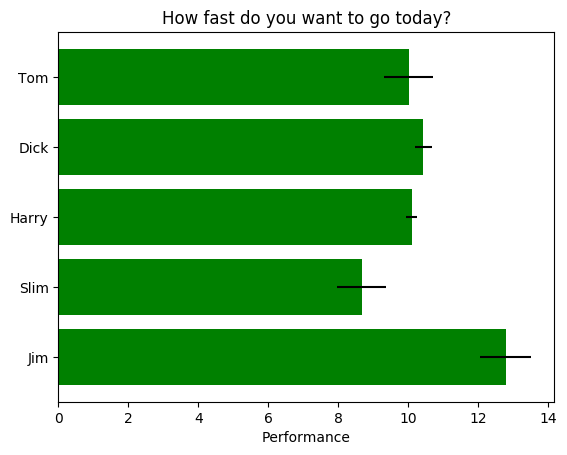

In [302]:
# https://matplotlib.org/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

The above is fairly clear. It's a lot less clear as a piechart.

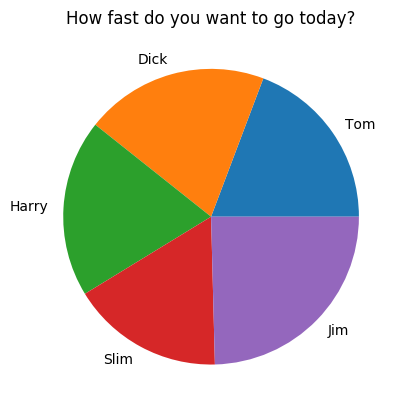

In [303]:
# Adapted to piechart
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.pie(performance, labels=people)
ax.set_title('How fast do you want to go today?')

plt.show()


What about continuous data? Scatterplot is a natural fit, and higher dimensions can be represented by size, color, or other visual aspects of the points.

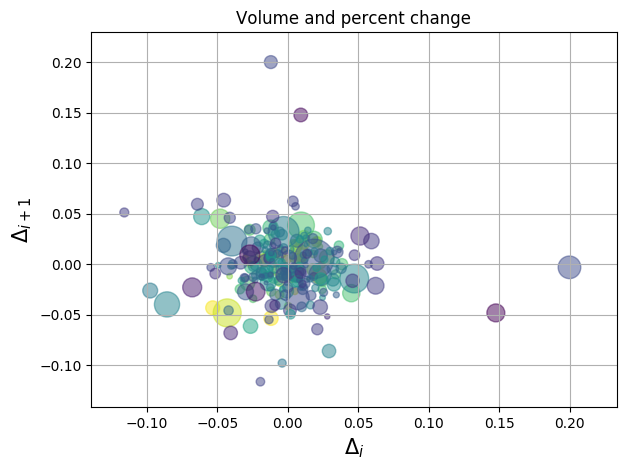

In [304]:
# https://matplotlib.org/gallery/lines_bars_and_markers/scatter_demo2.html#sphx-glr-gallery-lines-bars-and-markers-scatter-demo2-py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

An alternative way to represent higher dimensional data is with 3D scatterplots - but these are pretty hard to look at. Specifically, if it's not interactive (you can't drag it and move it around), your eye may not be able to distinguish which spatial dimension is separating two specific points.

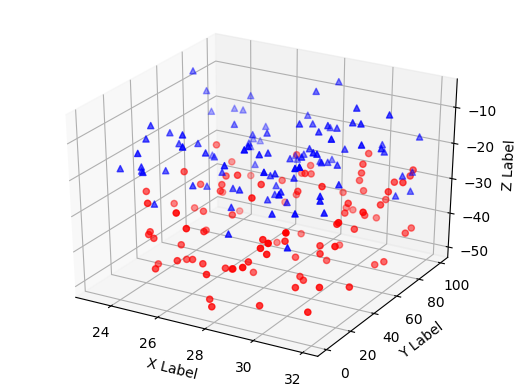

In [305]:
# https://matplotlib.org/gallery/mplot3d/scatter3d.html#sphx-glr-gallery-mplot3d-scatter3d-py
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

Live lecture - let's pick some plots and try them!
- https://matplotlib.org/gallery - the foundational Python plotting library
- https://seaborn.pydata.org/examples/index.html - opinionated, built on matplotlib so less configurable but arguably more usable/pretty (or easy to make pretty)
- http://ggplot.yhathq.com/ - based on R's ggplot2 (the "Grammar of Graphics", a consistent and widely used foundation of plotting, particularly by academics)
- https://bokeh.pydata.org/en/latest/ - interactive plots - write in Python, build and serve in HTML and JavaScript
- https://plot.ly/ - similar to Bokeh but with a commercial service (though the software itself is still open source)
- https://altair-viz.github.io/ - declarative visual graphics - a little different than the matplotlib/seaborn paradigm (based on the Vega Visualization Grammar) 
- https://python.libhunt.com/seaborn-alternatives - even more!



## Assignment - draw some plots!

In the following section you should draw at least *3* plots, using the data you loaded yesterday - the first should be with matplotlib. The other two can be with any Python tool of your choice - Seaborn in particular is suggested to try. It is OK to start with code from a gallery/example or whatever documentation you find, but try to get it working with your own data.

After you make the plots, write a summary (around a paragraph) for each plot, interpreting and describing it and what insight it gives you into the data. This summary should be written for an "interested but non-technical" audience - that is usually the sort of audience data scientists communicate with. Try to *explain* what's going on without making it scary.

Stretch goals:
- Interactive plots! (from the above tools, either Bokeh or plot.ly)
- 3D plots that are intuitive/informative (and probably also interactive)
- Share your plot! Take a screenshot and drop it in the cohort channel or elsewhere in Slack
- Deploy! If it's interactive, you can put it out there (plot.ly will host your plot for you, and Bokeh will make an HTML file)
- Work on your local Python setup - so far we've just used Colab, but [Anaconda](https://www.anaconda.com/download/) is a local environment for Python that lets you do everything you can in Colab and more

#Country Temp Data
Sub plots to show temp is trending up in N. America

In [7]:
import pandas as pd

#create a dictionary pairing country names to their ISO3 Code, this could be expanded to include all countries
#loop through all countries and concat the ISO code and file type to the end of the URL
countries = {'Canada':'CAN',
            'UnitedStates':'USA',
            'Mexico':'MEX'}
partial_url = 'http://climatedataapi.worldbank.org/climateweb/rest/v1/country/cru/tas/year/'
file_type = '.csv'

#create an empty data frame for each csv to merge into
temps = pd.DataFrame()

#loop through and add columns on to temps
for key in countries:
  url = (partial_url + countries[key] + file_type)
  response = pd.read_csv(url)
  #add the columns in and rename 'data' to it's respective country name
  temps['year'] = response['year']
  temps[key] = response['data']
  
#clean it up by setting the index to year
temps = temps.set_index('year')

temps.head()

,Canada,UnitedStates,Mexico
year,,,
1901,-7.672419,6.618749,20.528099
1902,-7.862711,6.464327,20.804192
1903,-7.910783,6.073844,20.176123
1904,-8.155729,6.149883,20.640743
1905,-7.547311,6.599617,20.437515


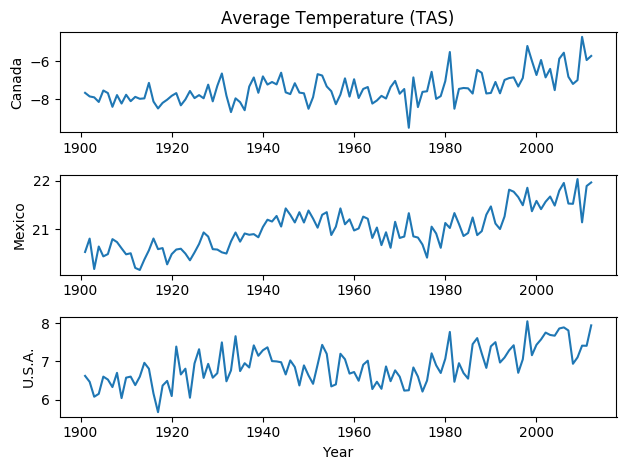

In [307]:
#subplot set up and title
plt.subplot(3, 1, 1)
plt.title('Average Temperature (TAS)')

#first plot
plt.plot(temps.index, temps['Canada'])
plt.ylabel('Canada')

#second plot
plt.subplot(3, 1, 2)
plt.plot(temps.index, temps['Mexico'])
plt.ylabel('Mexico')

#third plot 
plt.subplot(3,1,3)
plt.plot(temps.index, temps['UnitedStates'])
plt.ylabel('U.S.A.')
#add a label for the X-Axis
plt.xlabel('Year')

plt.tight_layout() #keep things clean and spaced
plt.show();
#all graphs show a roughly 2 degree increase over the time scale

Above are the average temperatures for North America by country. We can see that over the past century average temps at surface have risen by roughly 2 degrees in North America. We can also see that in the 80's there appears to be an increase in the rate of temperature increase. With such a small data set we can can't draw many conclusions but it does point to a possible temperature rise. This can be confirmed through global temperatures and over a larger time scale. We would also need to collect data on other measures of temp than simply relying on Temperature at Surface.

#Comics Data
Show the representation of men vs. women in comics

In [49]:
from google.colab import files
upload = files.upload()

In [0]:
marvel_df = pd.read_csv('marvel-wikia-data.csv')
dc_df = pd.read_csv('dc-wikia-data.csv')

marvel_df['publisher'] = 'Marvel'
marvel_df = marvel_df.rename(columns = {'Year':'YEAR'})

dc_df['publisher'] = 'DC'

comic_chars_df = marvel_df.append(dc_df)

In [0]:
from pandas.api.types import is_numeric_dtype

for header in comic_chars_df:
  if is_numeric_dtype(comic_chars_df[header]):
    comic_chars_df[header] = comic_chars_df[header].fillna(-1)
  else:
    comic_chars_df[header] = comic_chars_df[header].fillna('unknown')

In [312]:
#Pulling out into smaller data frames to make it easier to work with and trouble shoot
male_heroes = comic_chars_df[comic_chars_df['SEX'] == 'Male Characters']
male_heroes.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,publisher
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,unknown,Living Characters,4043.0,Aug-62,1962.0,Marvel
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,unknown,Living Characters,3360.0,Mar-41,1941.0,Marvel
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,unknown,Living Characters,3061.0,Oct-74,1974.0,Marvel
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,unknown,Living Characters,2961.0,Mar-63,1963.0,Marvel
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,unknown,Living Characters,2258.0,Nov-50,1950.0,Marvel


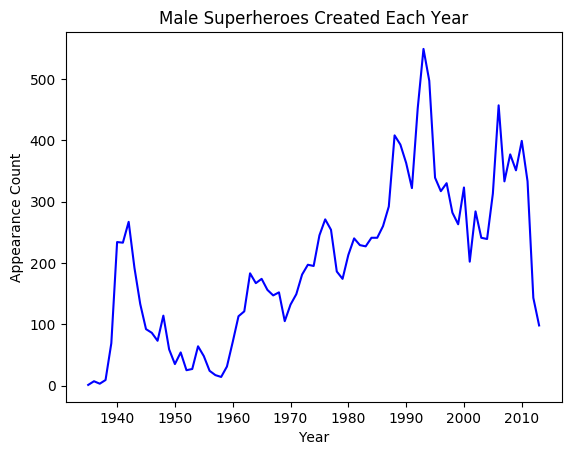

In [313]:
#here we have our plot of male superheroes with a steady trend up
#plotting this took longer than expected because my index wasn't sorted causing one funky looking graph
male_heroes = male_heroes[male_heroes['YEAR'] != -1] #drop the unknowns
male_counts = pd.DataFrame([male_heroes['YEAR'].value_counts(),male_heroes['YEAR'].unique()]).T.drop(['Unnamed 0'], axis='columns') #make a DF with new male heroes per year
male_counts.columns = ['male_count'] #rename a column
male_counts = male_counts.sort_index() #sort my index!

#test to see if it works
plt.plot(male_counts.index,male_counts['male_count'], color='b')
plt.xlabel('Year')
plt.ylabel('Appearance Count')
plt.title('Male Superheroes Created Each Year')
plt.show();

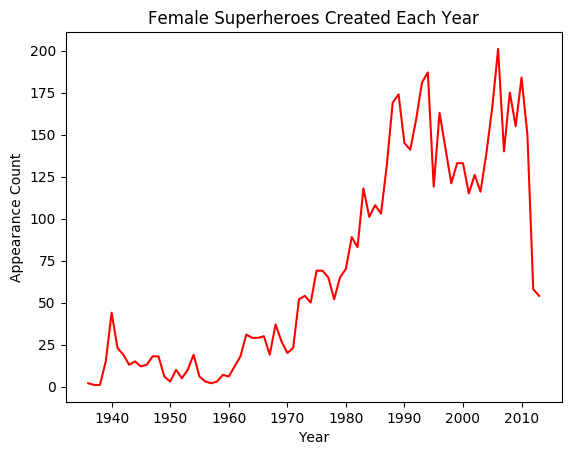

In [314]:
#same deal as the males above
#we see a much steeper climb with female heroes. Girl power!
female_heroes = comic_chars_df[comic_chars_df['SEX'] == 'Female Characters']
female_heroes = female_heroes[female_heroes['YEAR'] != -1]
female_counts = pd.DataFrame([female_heroes['YEAR'].value_counts(),female_heroes['YEAR'].unique()]).T.drop(['Unnamed 0'], axis='columns')

female_counts.columns = ['count']
female_counts = female_counts.sort_index()

plt.plot(female_counts.index,female_counts['count'],color='r')

plt.xlabel('Year')
plt.ylabel('Appearance Count')
plt.title('Female Superheroes Created Each Year')
plt.show();

In [315]:
#making a singular DF to make things easier
sex_counts = male_counts
sex_counts['female_count'] = female_counts['count']
sex_counts['female_count'] = sex_counts['female_count'].fillna(0)
sex_counts['total'] = sex_counts['male_count'] + sex_counts['female_count']
sex_counts.head()


,male_count,female_count,total
1935.0,1.0,0.0,1.0
1936.0,7.0,2.0,9.0
1937.0,3.0,1.0,4.0
1938.0,9.0,1.0,10.0
1939.0,69.0,15.0,84.0


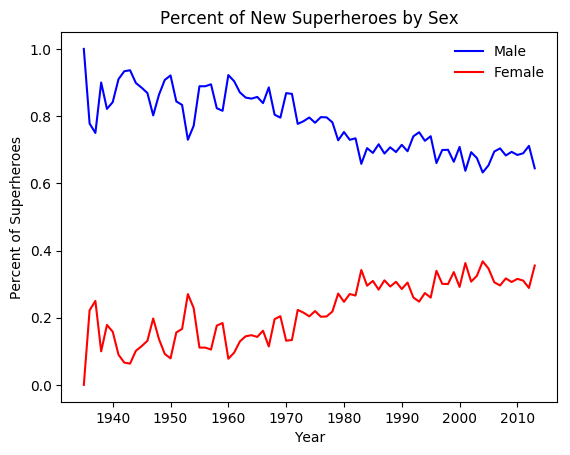

In [351]:
#The meat and potatoes, even though females had a rapid rise we can see superheroes are still male dominated
#plt.scatter(sex_counts.index, (sex_counts['male_count']/sex_counts['total']))    Commented out because the scatter wasn't as clean
#plt.scatter(sex_counts.index, (sex_counts['female_count']/sex_counts['total']))
plt.plot(sex_counts.index, (sex_counts['male_count']/sex_counts['total']), label='Male', color='b')
plt.plot(sex_counts.index, (sex_counts['female_count']/sex_counts['total']), label='Female', color='r')

#Adding labels and what not
plt.title('Percent of New Superheroes by Sex')
plt.xlabel('Year')
plt.ylabel('Percent of Superheroes')
plt.legend(frameon=False)

plt.show()

Looking at the first graph in the series we can see that number of male superheroes created has increased at a steady linear rate over time with dips here and there. In the second graph we see that female superheroes exploded starting in the 60's with what looks like exponential growth. With these two graphs alone we might be led to believe ladies are well represented in modern comics. This is not the case. We can see, by comparing male and female superhero creation as a percentage of the total superheroes created, that male superheroes are still being spawned at a greater rate than female superheroes. This leads us to the conclusion that their is still a gender representation gap in comics.

Further investigation could include: comic sales by consumer sex/hero sex, sex of comic creators, popularity rating of heroes. All of these and more may point to how to address the gender gap and further confirm the findings.

#Admissions Data
Giving this the short shrift to spend time better understanding "ax,fig"

In [318]:
upload = files.upload()

In [320]:
admissions = pd.read_csv('Admission_Predict_Ver1.1.csv')
admissions.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
import seaborn as sns

sns.pairplot(admissions);

NameError: ignored

#Understanding "ax,fig"
[link](https://colab.research.google.com/drive/1Za-IVwxIU8kqn8pmgI2szFB894cONJJI)

In [0]:
import numpy as np
x = np.linspace(0, 5, 11)
y = x ** 2

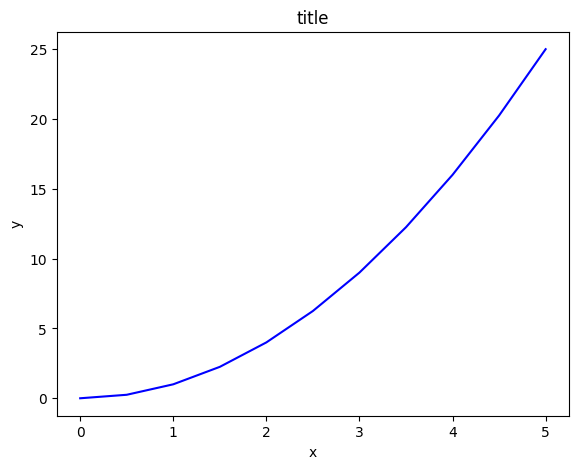

In [323]:
#create a Figure (empty canvas)
fig = plt.figure()

#add set of axes to the figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

#plot on that set of axes
axes.plot(x,y,'b')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')

plt.show();

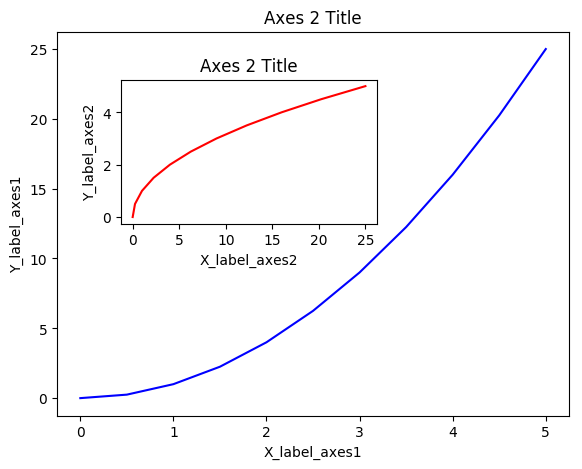

In [324]:
#create a blank figure again
fig = plt.figure()

axes1 = fig.add_axes([.1, .1, .8, .8]) #create the main axes
axes2 = fig.add_axes([.2, .5, .4, .3]) #inset axes

#larger Figure on Axes 1
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes1')
axes1.set_ylabel('Y_label_axes1')
axes1.set_title('Axes 2 Title')

#inset Figure on Axes 2
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title')

plt.show();

Text(0.5, 1.0, 'Axes 2 Title')

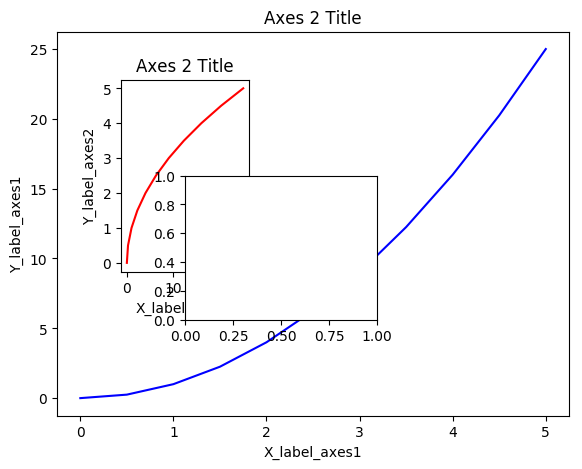

In [325]:
#testing plot-inception
#create a blank figure again
fig = plt.figure()

axes1 = fig.add_axes([.1, .1, .8, .8]) #create the main axes
axes2 = fig.add_axes([.2, .4, .2, .4]) #inset axes
axes3 = fig.add_axes([.3,.3,.3,.3]) # cool, no limit but why would you

#larger Figure on Axes 1
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes1')
axes1.set_ylabel('Y_label_axes1')
axes1.set_title('Axes 2 Title')

#inset Figure on Axes 2
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title')

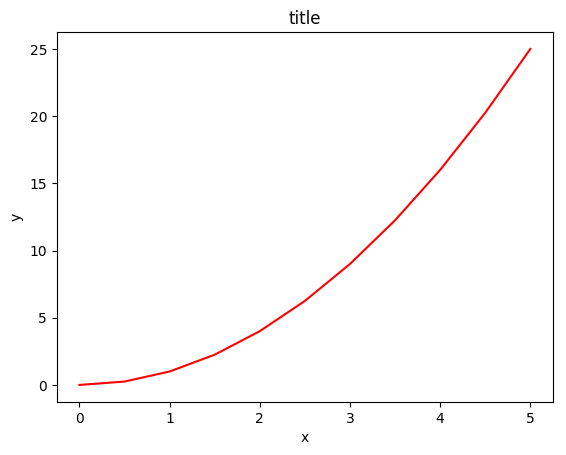

In [326]:
#similar to plt.figure except unpacking tuple
#test to look at tuple: print(plt.subplots()) = (<Figure size 640x480 with 1 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x7f9a848c3d68>)
fig, axes = plt.subplots()

#now add things using axes
axes.plot(x,y,'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')

plt.show();

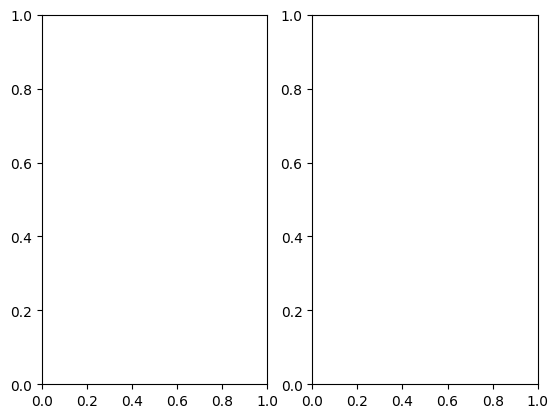

In [327]:
fig, axes = plt.subplots(1,2)

In [328]:
#Axes is an array of axes to plot
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a8203c978>,
      dtype=object)

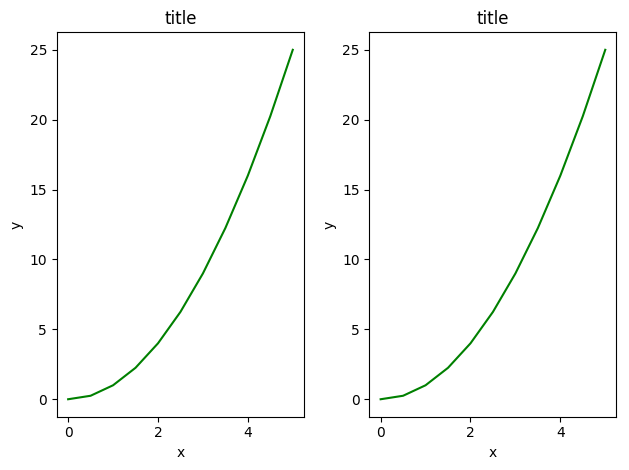

In [329]:
fig, axes = plt.subplots(1,2)

for ax in axes:
  ax.plot(x,y,'g')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_title('title')

fig
plt.tight_layout() #prevents overlapping content

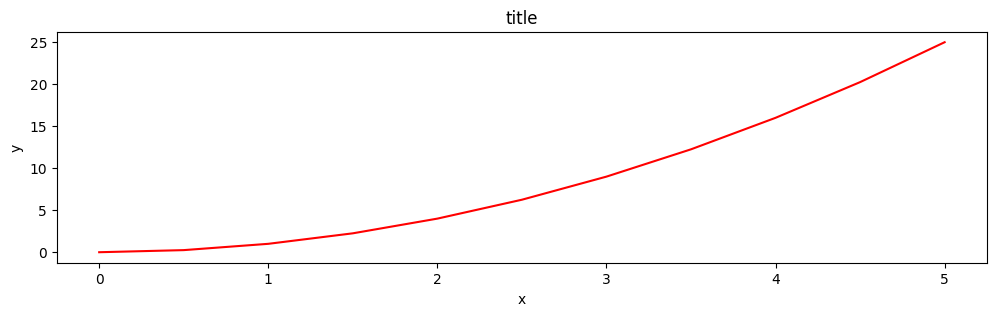

In [330]:
fig, axes = plt.subplots(figsize=(12,3)) #control figure dimensions

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')

plt.show();

In [0]:
fig.savefig("test.png") #save a graph

In [332]:
ax.set_title("Title")

Text(0.5, 1.0, 'Title')

In [333]:
ax.set_xlabel("x")
ax.set_ylabel("y")

Text(336.49999999999994, 0.5, 'y')

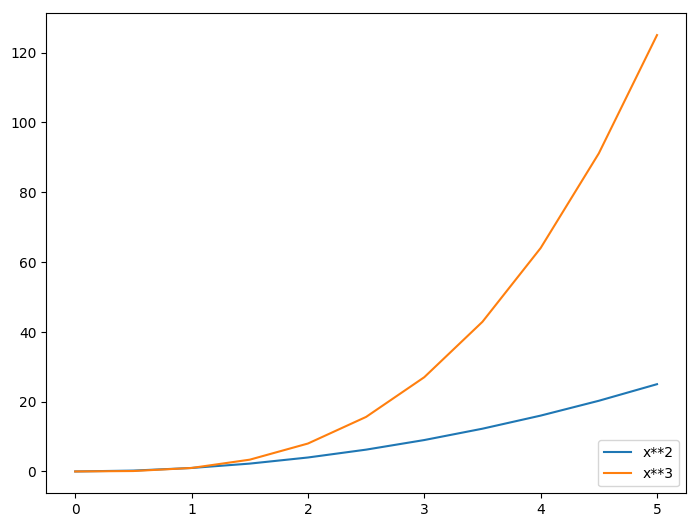

In [334]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.plot(x, x**2, label='x**2')
ax.plot(x, x**3, label='x**3')
ax.legend(loc=4) #add a legend based on the labels and set the location, loc=0 or no loc sets what matplotlib thinks is optimal

plt.show()

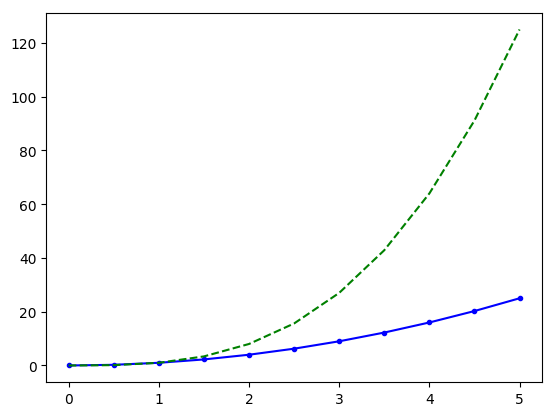

In [335]:
fig, ax = plt.subplots()

ax.plot(x, x**2, 'b.-') #blue line with dots
ax.plot(x, x**3, 'g--') #green dashed line

plt.show()

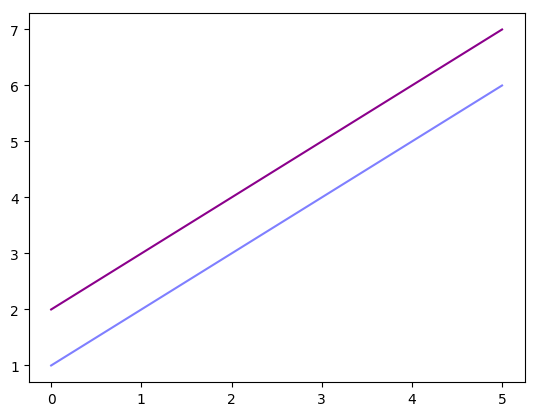

In [336]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color='blue', alpha=.5) #blue and half transparent
ax.plot(x, x+2, color='#8B008B') #color from hexcode

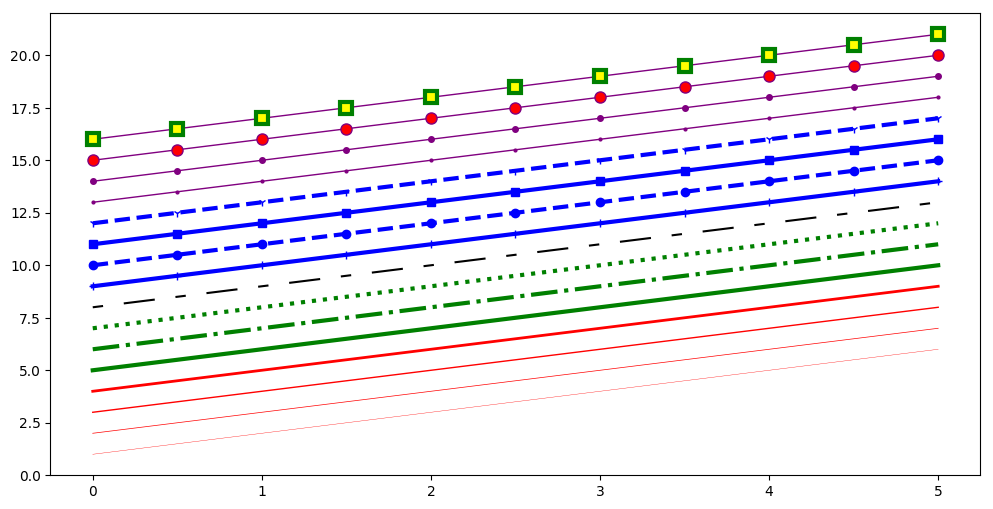

In [337]:
#Getting excessive with features
fig, ax = plt.subplots(figsize=(12,6))

#how fat is your line
ax.plot(x, x+1, color="red", linewidth=0.25)
ax.plot(x, x+2, color="red", linewidth=0.50)
ax.plot(x, x+3, color="red", linewidth=1.00)
ax.plot(x, x+4, color="red", linewidth=2.00)

# possible linestyle options 
ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+10, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+11, color="blue", lw=3, ls='-', marker='s')
ax.plot(x, x+12, color="blue", lw=3, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

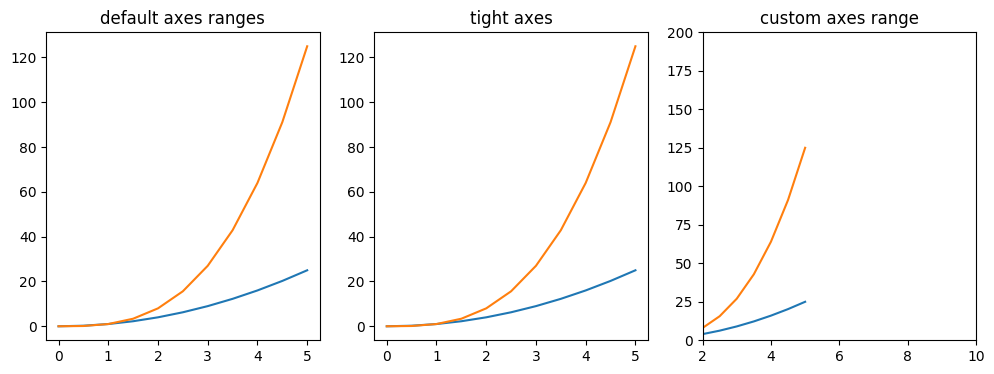

In [338]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 200])
axes[2].set_xlim([2, 10])
axes[2].set_title("custom axes range");

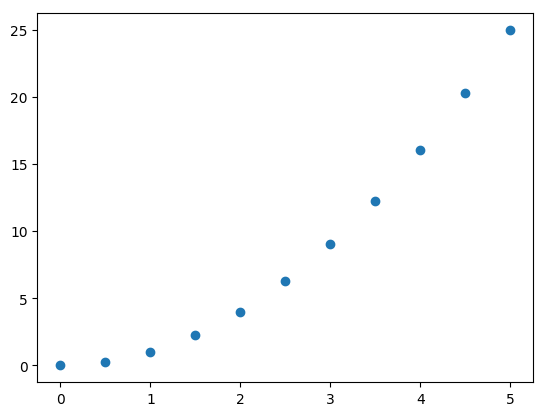

In [339]:
plt.scatter(x,y)

(array([ 7.,  9.,  9.,  8., 15., 12., 11., 14.,  5., 10.]),
 array([  2. , 100.9, 199.8, 298.7, 397.6, 496.5, 595.4, 694.3, 793.2,
        892.1, 991. ]),
 <a list of 10 Patch objects>)

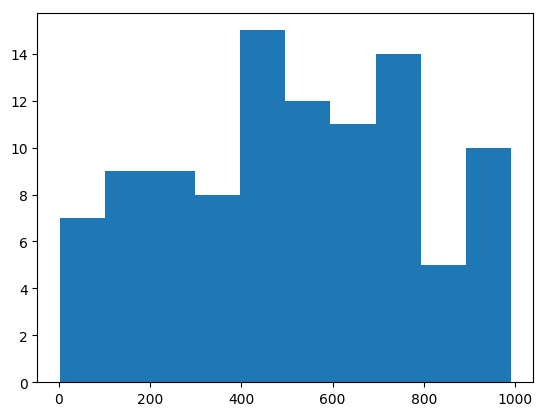

In [340]:
from random import sample
data = sample(range(1, 1000), 100)
plt.hist(data)

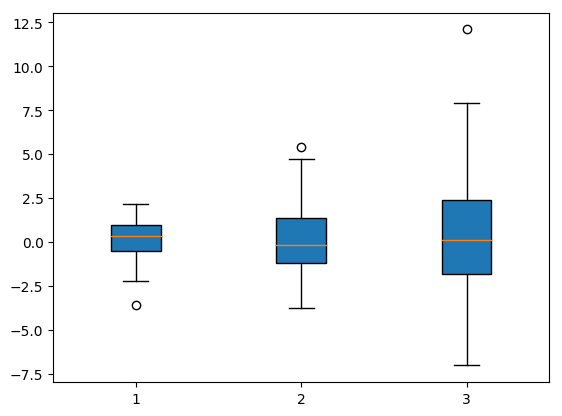

In [341]:
data = [np.random.normal(0, std, 100) for std in range(1, 4)]

# rectangular box plot
plt.boxplot(data,vert=True,patch_artist=True);   

In [342]:
admissions.head()
admissions.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

Text(0.5, 1.0, 'test')

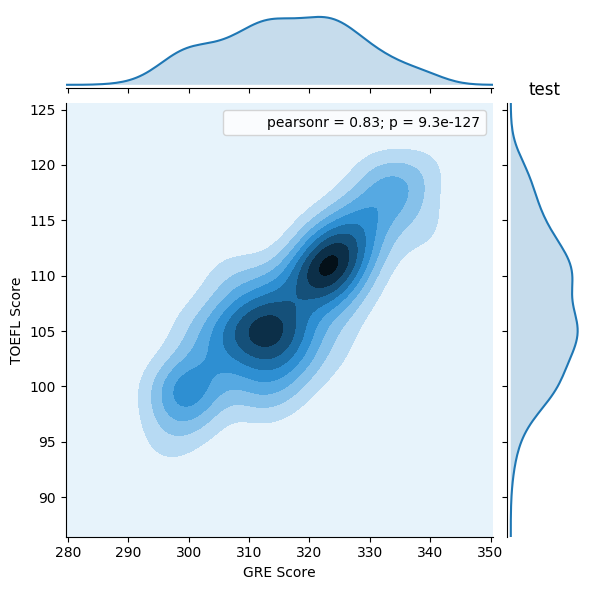

In [343]:
sns.jointplot(x='GRE Score',y='TOEFL Score', data=admissions, kind='kde')
plt.title('test')

#Explore and breakdown gallery graph

[source](https://matplotlib.org/examples/images_contours_and_fields/pcolormesh_levels.html)

In [0]:
#imports, find out what we are doing with them later
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np

In [0]:
# make these smaller to increase the resolution
dx, dy = .05, .05

# generate 2 2d grids for the x & y bounds
#mgrid[start_val:end_val:step_val]
y, x = np.mgrid[slice(1, 5 + dy, dy),
                slice(1, 5 + dx, dx)]

#testing mgrid functionality
#z = np.mgrid[1:5:2]
#print(z)

In [0]:
z = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)

# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max()) #"depth" of the z dimension, altering changes the fidelity...
                                                             #of the contours by removing how many steps from top to bottom on z

# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('magma') #part color control
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True) #generate a normalized color map based on discrete intervals (levels from above)
                                                       #if clip is true, than values outside of the range are set to 0, or 1

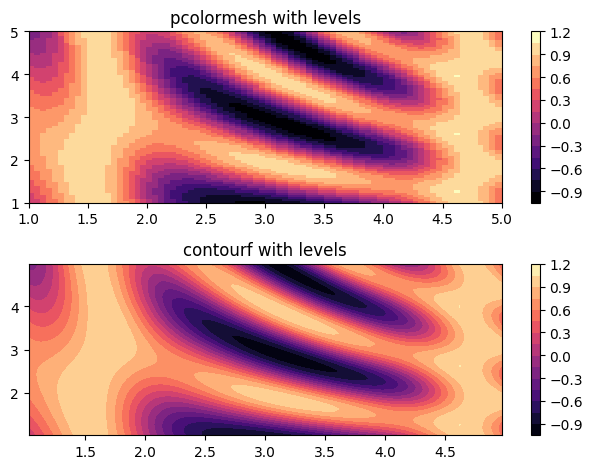

In [294]:
fig, (ax0, ax1) = plt.subplots(nrows=2) #create a new figure to draw in and 2 ax's to plot on

im = ax0.pcolormesh(x, y, z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax0)
ax0.set_title('pcolormesh with levels')


# contours are *point* based plots, so convert our bound into point
# centers
cf = ax1.contourf(x[:-1, :-1] + dx/2.,
                  y[:-1, :-1] + dy/2., z, levels=levels,
                  cmap=cmap)
fig.colorbar(cf, ax=ax1)
ax1.set_title('contourf with levels')

# adjust spacing between subplots so `ax1` title and `ax0` tick labels
# don't overlap
fig.tight_layout()

plt.show()

#Alcohol Consumption
[source](https://github.com/plotly/datasets/blob/master/2010_alcohol_consumption_by_country.csv)

In [8]:
#importing a data set ready made for a bar plot practice
alcohol = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2010_alcohol_consumption_by_country.csv')
alcohol.head(30)

,location,alcohol
0,Belarus,17.5
1,Moldova,16.8
2,Lithuania,15.4
3,Russia,15.1
4,Romania,14.4
5,Ukraine,13.9
6,Andorra,13.8
7,Hungary,13.3
8,Czech Republic,13.0
9,Slovakia,13.0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


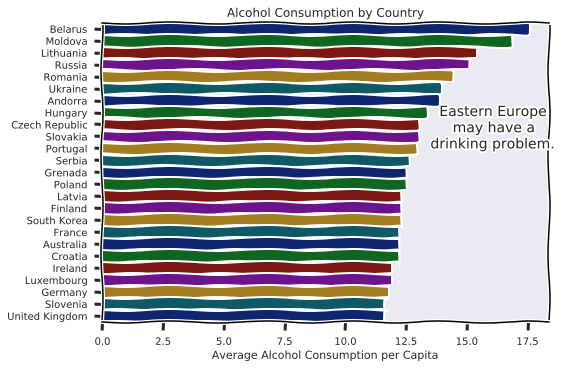

In [47]:
#trying out the xkcd styling
plt.xkcd()

#creating fig and ax then plotting the top 25 countries
fig, ax = plt.subplots()
sns.barplot(x='alcohol', y='location', data=alcohol.head(25), palette='dark')

#details matter
ax.set(xlabel='Average Alcohol Consumption per Capita',ylabel='')
ax.set_title('Alcohol Consumption by Country')
plt.annotate('  Eastern Europe \n     may have a \ndrinking problem.',xy=(13.5,10))

#ta-da!
plt.show();

#Canadian Immigration with DJI
[source1](https://github.com/plotly/datasets/blob/master/Canada%20Immigration.csv)

[source2](https://finance.yahoo.com/quote/%5EDJI/history?p=%5EDJI)

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import files

In [6]:
upload = files.upload()

Saving DJI.csv to DJI (1).csv


In [28]:
immigration = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/Canada%20Immigration.csv')
monthly_dji = pd.read_csv('DJI.csv')
monthly_dji.head(26)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-01-01,10452.740234,10705.179688,10367.410156,10488.070313,10488.070313,4380510000
1,2004-02-01,10487.780273,10753.629883,10434.669922,10583.919922,10583.919922,3894640000
2,2004-03-01,10582.250000,10695.549805,10007.490234,10357.700195,10357.700195,5009640000
3,2004-04-01,10357.519531,10570.809570,10219.179688,10225.570313,10225.570313,4530000000
4,2004-05-01,10227.269531,10386.320313,9852.190430,10188.450195,10188.450195,4016800000
5,2004-06-01,10187.179688,10498.669922,10134.860352,10435.480469,10435.480469,4111110000
6,2004-07-01,10434.000000,10448.089844,9913.919922,10139.709961,10139.709961,4452180000
7,2004-08-01,10138.450195,10211.250000,9783.910156,10173.919922,10173.919922,3756550000
8,2004-09-01,10170.120117,10363.360352,9977.919922,10080.269531,10080.269531,4638370000
9,2004-10-01,10082.040039,10270.370117,9708.400391,10027.469727,10027.469727,5292920000


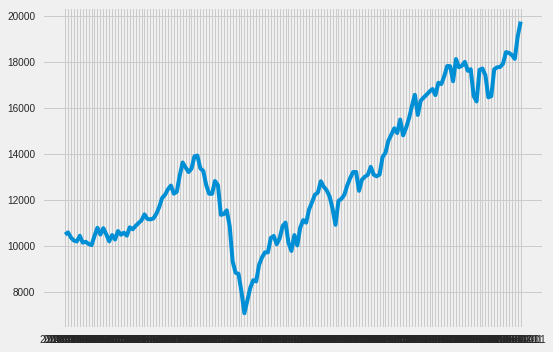

In [11]:
import matplotlib.style as style
style.use('fivethirtyeight')

#testing and getting a feel for the data
plt.plot(monthly_dji['Date'], monthly_dji['Close'])
plt.show();

In [65]:
monthly_dji.shape

(156, 7)

In [102]:
#loop over the monthly_dji and find yearly averages
#this could definitely be refactored
annual_dji = []
year_sum = 0

for row in monthly_dji.iterrows():
  if row[0]%12 == 0:
    annual_dji.append(year_sum/12)
    year_sum = 0
  year_sum += row[1][5]
annual_dji.append(year_sum/12)
annual_dji.remove(0)

print(annual_dji)

[10325.965820416666, 10529.128418083334, 11472.080892166668, 13197.979166666664, 11224.264892583335, 8887.829264333333, 10594.934082166668, 12093.42244475, 13003.918294333336, 15083.909993416666, 16862.442464166666, 17487.962809416666, 18027.382649666666]


In [113]:
immigration['annual_dji'] = annual_dji
immigration.head(13)

,Year,USA,UK,annual_dji
0,2004,6994,7524,10325.965820
1,2005,8392,7253,10529.128418
2,2006,9612,7136,11472.080892
3,2007,9460,8213,13197.979167
4,2008,10187,8976,11224.264893
5,2009,8995,8872,8887.829264
6,2010,8142,8719,10594.934082
7,2011,7674,6128,12093.422445
8,2012,7870,6172,13003.918294
9,2013,8486,5814,15083.909993


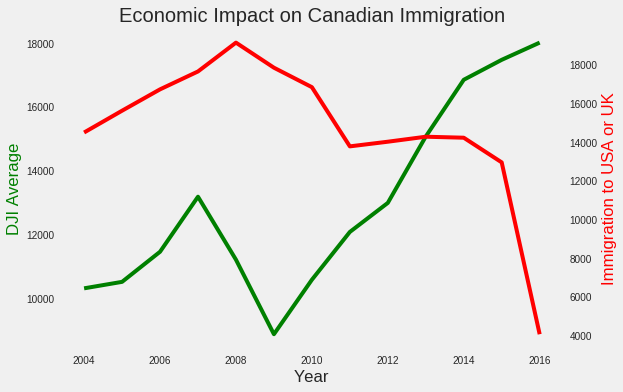

In [128]:
#set style
style.use('fivethirtyeight')
#new fig and ax
fig,ax0 = plt.subplots()

#first line to plot
ax0.plot(immigration['Year'],immigration['annual_dji'],color='g')
ax0.set_xlabel('Year')
ax0.set_ylabel('DJI Average',color='g')
ax0.grid(False)

#create a second ax with same X-Axis
ax1=ax0.twinx()

#second line plot
ax1.plot(immigration['Year'],(immigration['USA']+immigration['UK']),color='r')
ax1.set_ylabel('Immigration to USA or UK',color='r')
ax1.grid(False)

#title and ta-da
ax0.set_title('Economic Impact on Canadian Immigration')
plt.show();

#Not a terribly informative graph after all that